# Journey 3: HARK for Policy Makers
HARK is a powerful toolbox to solve heterogeneous agent models in discrete time. Users can run off-the shelf models or use tools to build their own agent type. While there are numerous notebooks which introduce and describe different agents and tools it might be overwhelming at first.

This guide tries to introduce HARK and point out the most important resources such as notebooks, model types, and tools such that users can get quickly up to speed to analyze macroeconomic shocks. The outline for today covers:

1. Introduction into HARK
2. HARK meets SSJ
3. Benefits of using HARK?

Author: Adrian Monninger

## 1. Introduction into HARK

Heterogenous Agents Resources & toolKit (HARK) is a toolkit for the structural modeling of economic choices of optimizing and non-optimizing heterogeneous agents.

The open-source project [Econ-ark](https://github.com/econ-ark) contains the three main repositories [HARK](https://github.com/econ-ark/HARK), [DemARK](https://github.com/econ-ark/DemARK), and [RemARK](https://github.com/econ-ark/RemARK). On top of that, there is a [website](https://econ-ark.org/) and an [online documentation](https://hark.readthedocs.io/en/latest/) with useful descriptions and references to specific notebooks.

- HARK: Includes the source code as well as some example notebooks of how to use AgentTypes, tools, and MarketClasses
- DemARK: Demonstrations of economic models using HARK.
    - [Fisher Two Period](https://github.com/econ-ark/DemARK/blob/master/notebooks/FisherTwoPeriod.ipynb)
    - [Diamond OLG](https://github.com/econ-ark/DemARK/blob/master/notebooks/DiamondOLG.ipynb)
    - [Lucas Asset Pricing](https://github.com/econ-ark/DemARK/blob/master/notebooks/Lucas-Asset-Pricing-Model.ipynb)
- RemARK: R[eplications/eproductions] and Explorations Made using ARK.
    - [Carroll, Slacalek, Tokuoka, White (2017): The distribution of wealth and the marginal propensity to consume](https://github.com/econ-ark/REMARK/blob/master/REMARKs/cstwMPC.md)
    - [Cocco, Gomes, Maenhout (2005): Consumption and portfolio choice over the life cycle](https://github.com/econ-ark/REMARK/blob/master/REMARKs/CGMPortfolio.md)
    - [Krusell, Smith (1998): Income and wealth heterogeneity in the macroeconomy](https://github.com/econ-ark/REMARK/blob/master/REMARKs/KrusellSmith.md)
    - ...

## 1.1 Structure
HARK has two types of classes. One for the micro level called: `AgentType` and one for the macro level called: `Market`. Today, we will focus on the AgentType and use the sequence space toolbox for the macro level.

To understand the microeconomic models in HARK, you need to have some concept of the Agent-type class structure. In HARK more advanced models are subclasses of the more primitive ones. The diagram, illustrates this structure: the deterministic class `PerfForesightConsumerType`, is then a parent for the class of the consumers with idiosyncratic income shocks `IndShockConsumerType`. Next there is a class with the idiosyncratic and aggregate income shocks `𝙼𝚊𝚛𝚔𝚘𝚟ConsumerType`. However, it is not the end! There are subclass of the `AggShockConsumerType` which are designed to be integrated with the macroeconomic models, as well as there are many other subclasses.

![HARK structure](HARK_struct_2.png)

## 1.2 Example: `IndShockConsumerType`
The `IndShockConsumerType` is our standard consumer that receives two income shocks at the beginning of each period: a completely transitory shock $\newcommand{\tShkEmp}{\theta}{\tShkEmp_t}$ and a completely permanent shock $\newcommand{\pShk}{\psi}{\pShk_t}$.  Moreover, the agent is subject to borrowing a borrowing limit: the ratio of end-of-period assets $A_t$ to permanent income $P_t$ must be greater than $\underline{a}$. As with most problems in HARK, this model is stated in terms of *normalized* variables, dividing all real variables by $P_t$:

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t} {~} u(c_t) + \beta (1-D_{t+1})  \mathbb{E}_{t} \left[ (\Gamma{t+1}\psi_{t+1})^{1-\rho} v_{t+1}(m_{t+1}) \right], \\
a_t &=& m_t - c_t, \\
a_t &\geq& \text{$\underline{a}$}, \\
m_{t+1} &=& R/(\Gamma_{t+1} \psi_{t+1}) a_t + \theta_{t+1}, \\
(\psi_{t+1},\theta_{t+1}) &\sim& F_{t+1}, \\
\mathbb{E}[\psi]=\mathbb{E}[\theta] &=& 1, \\
u(c) &=& \frac{c^{1-\rho}}{1-\rho}.
\end{eqnarray*}

The object-oriented programming language makes it extremely easy to [use](https://github.com/econ-ark/HARK/blob/master/examples/ConsIndShockModel/IndShockConsumerType.ipynb). A small illustration is below solving an infinite horizon and lifecycle problem.




In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType, init_idiosyncratic_shocks
from HARK.utilities import plot_funcs_der, plot_funcs
import matplotlib.pyplot as plt
import numpy as np

### An infinite horizon Problem

In [2]:
# Create agent
IndShockExample_inf = IndShockConsumerType(**init_idiosyncratic_shocks, verbose = False)
IndShockExample_inf.cycles = 0 # Make this type have an infinite horizon

In [3]:
# Solve
IndShockExample_inf.solve()

Consumption function for an idiosyncratic shocks consumer type:


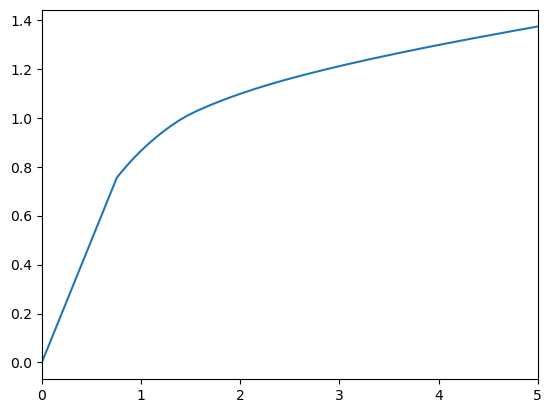

Marginal propensity to consume for an idiosyncratic shocks consumer type:


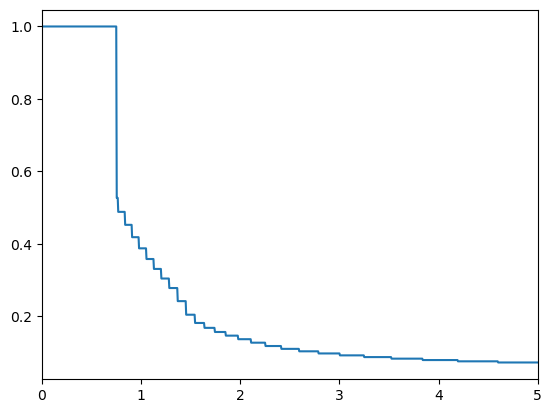

In [4]:
# Show
print('Consumption function for an idiosyncratic shocks consumer type:')
plot_funcs(IndShockExample_inf.solution[0].cFunc, IndShockExample_inf.solution[0].mNrmMin,5)
print('Marginal propensity to consume for an idiosyncratic shocks consumer type:')
plot_funcs_der(IndShockExample_inf.solution[0].cFunc, IndShockExample_inf.solution[0].mNrmMin,5)

### A lifecycle Problem

In [5]:
LifecycleExample = IndShockConsumerType(**init_idiosyncratic_shocks)
LifecycleExample.cycles = 1 # Make this consumer live a sequence of periods -- a lifetime -- exactly once
LifecycleExample.T_cycle = 10 # Specify the number of periods (T_cycles + terminal period)
# Adapt the time varying parameter. As you can see, you can specify different values for each period.
LifecycleExample.PermShkStd = [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0,0,0] 
LifecycleExample.TranShkStd = [0.3,0.2,0.1,0.3,0.2,0.1,0.3,0,0,0]
LifecycleExample.LivPrb = [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
LifecycleExample.PermGroFac = [1.01,1.01,1.01,1.02,1.02,1.02,0.7,1.0,1.0,1.0]
LifecycleExample.update_income_process()
LifecycleExample.solve()
print('First element of solution is',LifecycleExample.solution[0])
print('Solution has', len(LifecycleExample.solution),'elements.')

First element of solution is <HARK.ConsumptionSaving.ConsIndShockModel.ConsumerSolution object at 0x00000264977513A0>
Solution has 11 elements.


Consumption functions across the lifecycle:


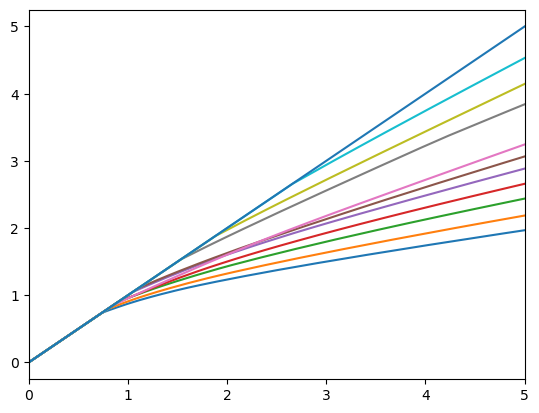

In [6]:
print('Consumption functions across the lifecycle:')
mMin = np.min([LifecycleExample.solution[t].mNrmMin for t in range(LifecycleExample.T_cycle)])
LifecycleExample.unpack('cFunc') # This makes all of the cFuncs accessible in the attribute cFunc
plot_funcs(LifecycleExample.cFunc,mMin,5)

### 2.3 Simulation
After we solved the model backwards, we can simulate agents forward using Monte Carlo or [Transition Matrices](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType_Transition_Matrix_Example.ipynb). These results can be used for in-model regressions or plotting distributions of assets or consumption.

In [7]:
# Specify parameters for the simulation
IndShockExample_inf.AgentCount = 5000                 # Number of agents of this type
IndShockExample_inf.T_sim = 1000                      # Number of periods to simulate
IndShockExample_inf.aNrmInitMean = np.log(0.0)        # Mean of log initial assets. The value of np.log(0.0) causes the code to ensure 
                                                      # newborns have have exactly 1.0 in market resources.
# i) Specify the variables you are interested in
IndShockExample_inf.track_vars = ['aNrm','mNrm','cNrm','pLvl', 'aLvl']
# ii) Initiate simulation
IndShockExample_inf.initialize_sim()
# iii) run it
IndShockExample_inf.simulate()

<ipython-input-7-2c475d88d71b>:4: RuntimeWarning: divide by zero encountered in log
  IndShockExample_inf.aNrmInitMean = np.log(0.0)        # Mean of log initial assets. The value of np.log(0.0) causes the code to ensure


{'aNrm': array([[0.13477216, 0.13477216, 0.13477216, ..., 0.13477216, 0.13477216,
         0.13477216],
        [0.18458863, 0.19472881, 0.36019685, ..., 0.24694693, 0.23423864,
         0.19472881],
        [0.2340878 , 0.19611905, 0.39512942, ..., 0.35783107, 0.32784551,
         0.31228166],
        ...,
        [0.76610173, 0.38338584, 0.79046548, ..., 0.46714871, 0.45734795,
         0.74678884],
        [0.76745896, 0.35495771, 0.77488497, ..., 0.65295079, 0.42983132,
         0.80784208],
        [0.86080718, 0.33702144, 0.73464255, ..., 0.52513369, 0.55314374,
         0.77669275]]),
 'mNrm': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.07996621, 1.09577145, 1.33687803, ..., 1.17503056, 1.15603281,
         1.09577145],
        [1.15580731, 1.09793838, 1.38440091, ..., 1.33359968, 1.29204745,
         1.27001928],
        ...,
        [1.84083916, 1.36890351, 1.86956737, ..., 1.47822901, 1.46590501,
         1.8179270

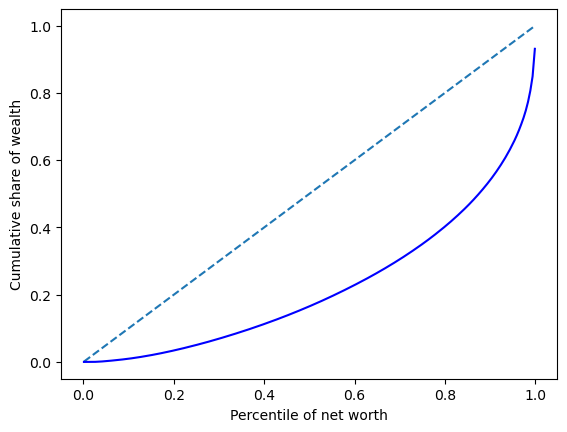

In [8]:
from HARK.utilities import get_lorenz_shares, get_percentiles
pctiles = np.linspace(0.001, 0.999, 200)
sim_Lorenz_points = get_lorenz_shares(IndShockExample_inf.state_now["aLvl"], percentiles=pctiles)
plt.plot(pctiles, pctiles, "--")
plt.plot(pctiles, sim_Lorenz_points, "-b")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.show(block=False)

# 2. HARK meets SSJ
HARK offers an extreme amount of flexibility solving the heterogeneous block in partial equilibrium. To include the general equilibrium parts, there are multiple options depending on your purpose. You could use the in-house [`MarketType`](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsAggShockModel.ipynb) to model your economy in which the agent lives or check out how we implemented [Krusell-Smith](https://github.com/econ-ark/KrusellSmith/blob/master/Code/Python/KrusellSmith.ipynb).

TODAY, we look at the interlinkage of HARK with the [Sequence Space Jacobian Toolbox](https://github.com/shade-econ/sequence-jacobian) you are already familiar with. (If not, take a look at their example notebooks or (re-)take the [NBER workshop from 2022](https://github.com/shade-econ/nber-workshop-2022))

The idea is to use HARK for the heterogeneous household part, solve the steady state values and jacobians, plug them in the sequence space toolbox and get all their nice functions for free! This is a way to combine the flexibility of HARK on the heterogeneity part and the fast and user-friendly general equilibrium part from SSJ.

Let's get into an introduction example [here](https://github.com/AMonninger/REMARK-ECB/blob/master/code/python/IndShockConsumerType_HANK.ipynb).

## 3. Why use HARK?
The question might now arrise: Why should I learn a new Toolkit and not stick to SSJ completely. Why does it make sense to specify the heterogeneous block in HARK and not simply stick to the off-the-shelf hetblocks?

The short answer is: HARK allows a lot of flexibility on the heterogeneous agent part! It enables the user to match mircoeconomic facts, introduce additional features such as retirement decisions or whole markets (risky asset, durable goods, labor) as well.

Below, we look into two examples which use HARK and manage to match the liquid asset distribution. Afterwards, we highlight some agenttypes with additional features, and give a starting point if you want to build your own Agent.

### 3.1 Targeting liquid asset distribution
In the [HARK meets SSJ notebook](https://github.com/AMonninger/REMARK-ECB/blob/master/code/python/IndShockConsumerType_HANK.ipynb), we targeted mean assets (SSJ targets mean MPC). But, what about the whole distribution? The importance of this is the difference between TANK and HANK: Households with large, but below one, MPCs respond to a shock not only in the period when the shock occurs, but in the subsequent periods as well. Those i(ntertermporal)MPCs are quantitatively relevant (see [Auclert et al 2018](https://www.nber.org/papers/w25020)) and shape the persistance of response functions.

HARK gives you the means to tweak your model such that you can match the asset, and with it the MPC, distribution. 

For instance, Carroll, Slacalek, Tokuoka, and White (2017) show that by having small ex-ante hetoerogeneity in discount rates, you can match the Lorenz curve remarkably well. The results can be seen below. If you want to redo the analysis check out this [demonstration](https://github.com/econ-ark/DemARK/blob/master/notebooks/Micro-and-Macro-Implications-of-Very-Impatient-HHs.ipynb) or [replication](https://github.com/econ-ark/DistributionOfWealthMPC).

![Lorenz_DisCount](Lorenzcurve_DiscRate.png)

A recent paper by [Carroll, Crawley, Frankovic, and Tretvoll](https://github.com/llorracc/HAFiscal) matches the intertemporal MPC in addition to the wealth distribution. For this, they add a 'splurge' factor; households spend each period a fixed fraction of their labor income.

Below is figure one from Carroll et al. With such a heterogeneous agent part in your quantitative HANK model allows you to make serious claims about quantitative changes from interest rate or government spending shocks.

![HAFiscal_Fig](HAFiscal_Fig1.png)

### 3.2 Other HARK agents
There are many more off-the-shelf agents waiting to be used. Including additional features, allows you to analyse other markets as well. Note, that you can solve and simulate them already, BUT the jacobians are not ready yet!

For a list, click [here](https://github.com/econ-ark/HARK/tree/master/HARK/ConsumptionSaving). Below some notable examples which solve problems with discrete choice. For them, the standard `HetBlock` of SSJ is not capable of solving.

#### a) [Portfolio Choice](https://github.com/econ-ark/HARK/blob/master/examples/ConsPortfolioModel/example_ConsPortfolioModel.ipynb)

Using the `PortfolioConsumerType` allows you to add risky assets to a one-asset model. A baseline [Lifecycle and Portfolio choice](https://github.com/econ-ark/REMARK/blob/master/REMARKs/CGMPortfolio.md) model a la Cocco, Gomes, & Maenhout (2005) is already implemented. Depending on your question, you can
- specify a share of risky asset holder exogeneously
- specify an exogeneous probability (a la calvo) with which agents can rebalance their portfolio (see [Luettike 2021](https://www.ralphluetticke.com/publication/aermacro_2020/) for an example)
- solve the share endogeneously with participation and transsaction costs 
- vary returns by age
- ...

For a life demonstration invite [Mateo](https://mv77.github.io/). In his JMP, he utilizes household expectations of stock returns to explain the equity premium puzzle.

#### b) Search and matching model

[Will](https://github.com/wdu9) combines a HANK with a Search and Match Model. For this, he uses the `ConsMarkovConsumerType` which can handle mutliple (employment) states. As a result, the model allows him to endogenize wage and unemployment dynamics.
Invite Will to present once his first draft is ready.


#### c) [Durable Good](https://github.com/AMonninger/DurableConsumerType_REMARK/blob/main/code/python/DurableModel_Notebook.ipynb)      

Using `DurableConsumerType` allows you to solve a household problem with non-durable and durable goods, where the adjustment of the durable stock entails a non-convex cost. This opens doors to analyze business cycle fluctuations of durable good demand, prices, as well as sectoral labor markets.

My JMP uses this agent in a partial and general equilibrium context. For this, I show how unemployment expectations drive durable consumption fluctuations. Matching consumption dynamics of durables and non-durables allows me to re-evaulate the impact of fiscal and monetary policy. I'm happy to present this in the near future.

### 3.3 Build your own Agent
In case your research question requires additional featuers off-the-shelf models do not have, you can add them relatively easy! As seen above, agents inherit features from other agents. Hence, search for the closest agenttype and replace the parts you want to change.

#### a) Understanding the code
Obviously, the most important thing is to understand the structure of the code. Then you can think about which code to replace and how.
A good starting point is this [notebook](https://github.com/econ-ark/HARK/blob/master/examples/HowWeSolveIndShockConsumerType/HowWeSolveIndShockConsumerType.ipynb) describing how we solve the `IndShockConsumerType`. Afterwards, look at the source code of other models which build on this one eg [`IndShockRiskyAssetConsumerType`](https://github.com/econ-ark/HARK/blob/master/HARK/ConsumptionSaving/ConsRiskyAssetModel.py) and observe how the replacement works.

#### b) Use our tools
We update our toolbox constantly. Hence, there might be something in for your current problem. For many of them exist notebooks to showcase their function.

Useful examples are:
- [DCEGM-Upper-Envelope](https://github.com/econ-ark/DemARK/blob/master/notebooks/DCEGM-Upper-Envelope.ipynb): To solve problems with nonconex value functions due to discrete choices
- [Harmenberg-Aggregation](https://github.com/econ-ark/DemARK/blob/master/notebooks/Harmenberg-Aggregation.ipynb): Aggregating distributions with a permanent-income-weighting
- [DecayInterp](https://github.com/econ-ark/HARK/tree/master/examples/Interpolation/DecayInterp.ipynb): Interpolation with decay which can be used if there exist an analytical limit
- ...

# Conclusion
In this journey you have learned how to use the `IndShockConsumer` and how to use its features in the partial equilibrium case. Afterwards, we have seen how easy it is to connect HARK to the sequence space toolbox in order to generate the general equilibrium blocks.

The selling point of HARK is its flexibility in the heterogeneous agent blocks. We can allow for features such as ex-ante heterogeneity in discount rates to match the asset distribution and use the resulting jacobians to get IRFs from SSJ. Hence, analysing monetary and fiscal policy responses get more accurate!

But, you don't have to stop there. HARK allows you to introduce the kind of heteroegeneity you need. Therefore, you are not restricted by the tools to answer your questions, but can start with the questions and define your tools after them!

# References
Carroll, C., Slacalek, J., Tokuoka, K., & White, M. N. (2017). The distribution of wealth and the marginal propensity to consume. Quantitative Economics, 8(3), 977-1020.

Cocco, J. F., Gomes, F. J., & Maenhout, P. J. (2005). Consumption and portfolio choice over the life cycle. The Review of Financial Studies, 18(2), 491-533.

Krusell, P., & Smith, Jr, A. A. (1998). Income and wealth heterogeneity in the macroeconomy. Journal of political Economy, 106(5), 867-896.